In [1]:
import pandas as pd, numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT ORG60.*
        , OMIT60."proba_1" as PROB_60OMIT, OMIT60."prediction" PRED_60OMIT
        , ORG90."proba_1" as PROB_90, ORG90."prediction" PRED_90
        , OMIT90."proba_1" as PROB_90OMIT, OMIT90."prediction" PRED_90OMIT
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_INCLUSION_VALIDATION_60DPD_ORIGINAL_FEATURES_SCORED" ORG60
    LEFT JOIN "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_INCLUSION_VALIDATION_60DPD_DNB_OMITTED_SCORED" OMIT60
        ON ORG60.CUST_ID = OMIT60.CUST_ID AND ORG60.SETID = OMIT60.SETID AND ORG60.REF_DATE = OMIT60.REF_DATE
    LEFT JOIN "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_INCLUSION_VALIDATION_90DPD_ORIGINAL_FEATURES_SCORED" ORG90
        ON ORG60.CUST_ID = ORG90.CUST_ID AND ORG60.SETID = ORG90.SETID AND ORG60.REF_DATE = ORG90.REF_DATE
    LEFT JOIN "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_INCLUSION_VALIDATION_90DPD_DNB_OMITTED_SCORED" OMIT90
        ON ORG60.CUST_ID = OMIT90.CUST_ID AND ORG60.SETID = OMIT90.SETID AND ORG60.REF_DATE = OMIT90.REF_DATE
;
''')
df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

df.head()

c:\Users\w510663\Anaconda3\lib\site-packages\snowflake\connector\options.py:108: UserWarning: You have an incompatible version of 'pyarrow' installed (12.0.1), please install a version that adheres to: 'pyarrow<10.1.0,>=10.0.1; extra == "pandas"'
  warn_incompatible_dep(
Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: The specified procedure could not be found.


Data Shape: (4108266, 41) 
Execution time: 3.553230082988739 minutes


,CUST_ID,SETID,REF_DATE,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,A_FLAG_REVOLVER_B,A_TENURE_MONTHS_N,A_NAICS_2_DIGIT_C,A_PORTFOLIO_C,A_BUSINESS_PROGRAM_C,...,FLAG_CHARGEOFF_366_DAYS,proba_0,proba_1,prediction,PROB_60OMIT,PRED_60OMIT,PROB_90,PRED_90,PROB_90OMIT,PRED_90OMIT
0,9100004752108,REV,2022-10-01 00:00:00-07:00,44.0,14.0,1,56,23,REV,WEX Fleet FlexCard Rebate Program,...,0,0.990889,0.009111,0,0.010722,0,0.003370,0,0.003529,0
1,9100003116079,FSC,2022-08-01 00:00:00-07:00,NaN,NaN,0,95,44,FSC,Speedway Business Fleet,...,0,0.990449,0.009551,0,0.013715,0,0.003941,0,0.006166,0
2,9100008275482,FSC,2022-03-01 00:00:00-08:00,5.0,4.0,0,22,Un,FSC,Sunoco Universal,...,0,0.927192,0.072808,0,0.097498,0,0.024882,0,0.042042,0
3,9100006584292,CHV,2022-03-01 00:00:00-08:00,NaN,NaN,0,39,23,CHV,Chevron and Texaco Business,...,0,0.988129,0.011871,0,0.015705,0,0.007885,0,0.008557,0
4,9100006813126,CHV,2022-07-01 00:00:00-07:00,NaN,NaN,0,43,44,CHV,Chevron and Texaco Business Access,...,0,0.993091,0.006909,0,0.007070,0,0.003101,0,0.002767,0


In [3]:
# change column names from proba_1 to PROB_60, preditction to PRED_60
col_dict = {'proba_1':'PROB_60', 'prediction':'PRED_60'}

df.rename(columns=col_dict, inplace=True)

In [4]:
df.columns

Index(['CUST_ID', 'SETID', 'REF_DATE', 'A_YEARS_IN_BUSINESS_APP_N',
       'A_FLEET_SIZE_APP_N', 'A_FLAG_REVOLVER_B', 'A_TENURE_MONTHS_N',
       'A_NAICS_2_DIGIT_C', 'A_PORTFOLIO_C', 'A_BUSINESS_PROGRAM_C',
       'A_MARKETING_CHANNEL_C', 'D_MAX_DAYS_PAST_DUE_6M_N',
       'D_MAX_DAYS_PAST_DUE_1M_N', 'D_MAX_EXPOSURE_1M_N',
       'D_DAYS_PAST_DUE_CURRENT_N', 'D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N',
       'D_DAYS_SINCE_LAST_30DPD_CURRENT_N', 'D_MAX_FRAC_UNBILLED_1M_N',
       'D_SPREAD_EXPOSURE_6M_N', 'D_SPREAD_FRAC_UNBILLED_6M_N',
       'DNB_COMMERCIAL_CREDIT_SCORE_CURRENT_N',
       'DNB_FINANCIAL_STRESS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SCORE_CURRENT_N',
       'LN_LEXISNEXIS_SBFE_SCORE_CURRENT_N',
       'T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N', 'T_SUM_GALLONS_1M_N',
       'T_SPREAD_GROSS_SPEND_6M_N', 'T_SPREAD_TOTAL_TRX_6M_N',
       'T_SPREAD_SUM_GALLONS_6M_N', 'FLAG_60_DPD_366_DAYS',
       'FLAG_90_DPD_366_DAYS', 'FLAG_CHARGEOFF_366_DAYS', 'proba_0', 'PROB_60',
       'PRED_60

In [30]:
eval_df = df.copy()
eval_df['REF_DATE'] = pd.to_datetime(eval_df['REF_DATE'], dayfirst=True, utc=True)
eval_df = eval_df[eval_df['REF_DATE'] >= '2022-04-01']

org60 = eval_df[['CUST_ID', 'SETID', 'REF_DATE', 'FLAG_60_DPD_366_DAYS','PROB_60', 'PRED_60']]
org60.rename(columns={'FLAG_60_DPD_366_DAYS':'target', 'PROB_60':'y_pred_proba', 'PRED_60':'y_pred'}, inplace=True)

omit60 = eval_df[['CUST_ID', 'SETID', 'REF_DATE', 'FLAG_60_DPD_366_DAYS','PROB_60OMIT', 'PRED_60OMIT']]
omit60.rename(columns={'FLAG_60_DPD_366_DAYS':'target', 'PROB_60OMIT':'y_pred_proba', 'PRED_60OMIT':'y_pred'}, inplace=True)

org90 = eval_df[['CUST_ID', 'SETID', 'REF_DATE', 'FLAG_90_DPD_366_DAYS','PROB_90', 'PRED_90']]
org90.rename(columns={'FLAG_90_DPD_366_DAYS':'target', 'PROB_90':'y_pred_proba', 'PRED_90':'y_pred'}, inplace=True)

omit90 = eval_df[['CUST_ID', 'SETID', 'REF_DATE', 'FLAG_90_DPD_366_DAYS','PROB_90OMIT', 'PRED_90OMIT']]
omit90.rename(columns={'FLAG_90_DPD_366_DAYS':'target', 'PROB_90OMIT':'y_pred_proba', 'PRED_90OMIT':'y_pred'}, inplace=True)

C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\1532370181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org60.rename(columns={'FLAG_60_DPD_366_DAYS':'target', 'PROB_60':'y_pred_proba', 'PRED_60':'y_pred'}, inplace=True)
C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\1532370181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omit60.rename(columns={'FLAG_60_DPD_366_DAYS':'target', 'PROB_60OMIT':'y_pred_proba', 'PRED_60OMIT':'y_pred'}, inplace=True)
C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\1532370181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [31]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

df_list = {'org60':org60, 'omit60':omit60, 'org90':org90, 'omit90':omit90}
df_flags = ['60DPD Original Features', '60DPD D&B Omitted', '90DPD Original Features', '90DPD D&B Omitted']

fpr = {}
tpr = {}
fpr_tpr_threshold = {}
roc_auc = {}
precision = {}
recall = {}
f1 = {}
precision_recall_threshold = {}
pr_auc = {}

for i,j in zip(df_list, df_flags):
    # Calculate ROC curve and AUC
    fpr[j], tpr[j], fpr_tpr_threshold[j] = roc_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    roc_auc[j] = auc(fpr[j], tpr[j])

    # Calculate precision-recall curve and AUC
    precision[j], recall[j], precision_recall_threshold[j] = precision_recall_curve(df_list[i]['target'], df_list[i]['y_pred_proba'])
    pr_auc[j] = auc(recall[j], precision[j])
    f1[j] = 2*precision[j]*recall[j]/(precision[j]+recall[j])

C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\3938151185.py:24: RuntimeWarning: invalid value encountered in divide
  f1[j] = 2*precision[j]*recall[j]/(precision[j]+recall[j])
C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\3938151185.py:24: RuntimeWarning: invalid value encountered in divide
  f1[j] = 2*precision[j]*recall[j]/(precision[j]+recall[j])


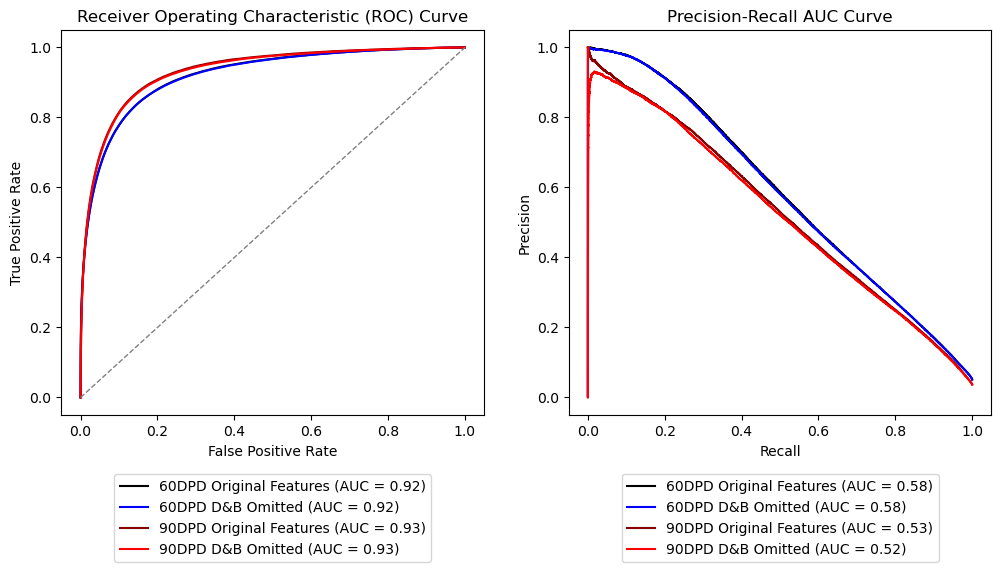

In [48]:
# Plot ROC-AUC and PR-AUC side by side
plt.figure(figsize=(12, 5))

colors = ['black', 'blue', 'darkred', 'red']
lines = []
lines2 = []
to_plot = df_flags

plt.subplot(1, 2, 1)
for p,c in zip(to_plot, colors):
    lines += plt.plot(fpr[p], tpr[p], color=c, lw=1.5, label=f'{p} (AUC = {roc_auc[p]:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
labels = [l.get_label() for l in lines]
# plot legend outside of plot
plt.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.subplot(1, 2, 2)
for p,c in zip(to_plot, colors):
    lines2 += plt.step(recall[p], precision[p], color=c, where='post', label=f'{p} (AUC = {pr_auc[p]:.2f})')
labels2 = [l.get_label() for l in lines2]
# move legend to lower center outside of plot
plt.legend(lines2, labels2, loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall AUC Curve')

# plt.tight_layout()
plt.show()

In [8]:
import matplotlib.ticker as ticker

def calculate_decile_table(binded, bins, target, y_pred_proba):
    result = []

    binded = binded.sort_values(y_pred_proba, ascending = False)
    binded["DECILE"] = pd.qcut(binded[y_pred_proba].rank(method='first'), q = bins, labels = list(range(bins, 0, -1)))
    binded["TOTAL_EVENT_RATE"] =  binded[target].mean()

    # Calculate the number of accounts and default accounts for each decile
    decile_df = binded.groupby("DECILE").agg(
        COUNT=("y_pred_proba", "count"),
        DEFAULT=("target", "sum"),
        TOTAL_EVENT_RATE=("TOTAL_EVENT_RATE", "mean"),
    ).reset_index()

    # Calculate the predicted probability range for each decile
    decile_df["PROB_RANGE"] = binded.groupby("DECILE")[y_pred_proba].agg(["min", "max"]).apply(lambda x: f"({x['min']:.4f} - {x['max']:.4f}]", axis=1).values
    decile_df["AVG_PROB"] = binded.groupby("DECILE")[y_pred_proba].agg(["mean"]).values
    decile_df["AVG_PROB"] = round(decile_df["AVG_PROB"], 4)

    # sort dataframes by decile
    decile_df = decile_df.sort_values(by="DECILE", ascending=False)

    # Calculate the cumulative number of accounts and default accounts
    decile_df["CUM_COUNT"] = round(decile_df["COUNT"].cumsum(),0)
    decile_df["CUM_DEFAULT"] = decile_df["DEFAULT"].cumsum()

    # Calculate the cumulative percentage of accounts and default accounts
    decile_df["CUM_PCT_COUNT"] = round(decile_df["CUM_COUNT"] / decile_df["COUNT"].sum() * 100, 3)
    decile_df["CUM_PCT_DEFAULT"] = round((decile_df["CUM_DEFAULT"] / decile_df["DEFAULT"].sum()), 3)

    # Calculate the default rate for each decile
    decile_df["DEFAULT_RATE"] = round((decile_df["DEFAULT"] / decile_df["COUNT"]), 3)

    # Calculate gain for each decile
    decile_df["GAIN"] = round((decile_df["CUM_DEFAULT"] / binded["target"].sum()), 3)

    # Calculate the lift for each decile
    decile_df["LIFT"] = round((decile_df["GAIN"]*100) / (decile_df["CUM_PCT_COUNT"]), 3)

    cols_to_display = [
        "DECILE", "PROB_RANGE", "AVG_PROB", "COUNT", "DEFAULT_RATE", "TOTAL_EVENT_RATE", "CUM_COUNT", "CUM_DEFAULT", "CUM_PCT_DEFAULT",
        "GAIN", "LIFT"
    ]

    decile_df = decile_df[cols_to_display]

    return decile_df


def lift_curve(name, df_binned):
    event_rate = df_binned["TOTAL_EVENT_RATE"].astype(float).mean()

    # Build event rate plot
    fig = plt.figure(figsize=(12,4))

    # Plot barplot containing number of observations
    plt.bar(df_binned.index, df_binned["COUNT"], color="lightgray")

    # Add ticks & laels to axis
    plt.xlabel("Model Sorted Predictions (Low → High)")
    plt.ylabel("# Observations")
    plt.xticks(df_binned.index, df_binned["PROB_RANGE"], rotation=45, ha='right', rotation_mode='anchor')
    plt.title(f"Actual vs. Predicted Lift Chart ({name})")

    # Mirror plot and add event rates
    plt2 = plt.twinx()
    plt2.set_ylabel("Event rate")
    plt2.set_ylim(ymin=0, ymax=df_binned["DEFAULT_RATE"].max() + 0.1)
    plt2.set_yticks(np.arange(0, df_binned["DEFAULT_RATE"].max() + 0.1, step=0.05))
    plt2.plot(
        df_binned.index, df_binned["DEFAULT_RATE"], label="event_rate", marker="o"
    )

    # add average prediction
    plt2.plot(
        df_binned.index,
        df_binned["AVG_PROB"],
        label="average_prediction",
        marker="x",
        linestyle=":",
        color="black"
    )

    # Add global event rate as baseline
    plt2.plot(
        [min(df_binned.index) - 1, max(df_binned.index) + 1],
        [event_rate, event_rate],
        color="darkgrey",
        lw=1,
        linestyle="--",
        label=f"total_event_rate\n({'{:.1%}'.format(event_rate)})",
    )
    plt2.legend(loc=0)
    plt2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt2.yaxis.grid(False)
    plt2.set_xlim([min(df_binned.index) - 0.5, max(df_binned.index) + 0.5])

    plt.show()

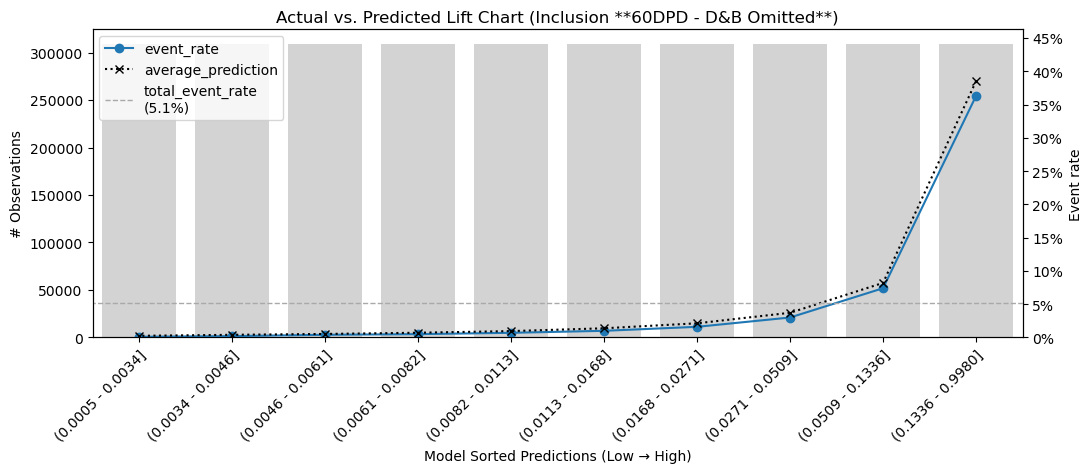

In [44]:
lift_curve(f'Inclusion **60DPD - D&B Omitted**', calculate_decile_table(omit60, 10, target = 'target', y_pred_proba='y_pred_proba'))

In [49]:
def split_data_by_q(df):
    df_by_q = {}
    q = ['2022_1H', '2022_2H']

    # change ref_date to date
    df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], dayfirst=True, utc=True)

    # create datafram call df_2022_1h which have ref_date in 1st half of the q 2022
    df_2022_1h = df[(df['REF_DATE'] >= '2022-01-01') & (df['REF_DATE'] < '2023-07-01')]
    df_2022_2h = df[(df['REF_DATE'] >= '2022-07-01') & (df['REF_DATE'] < '2023-01-01')]

    df_by_q[q[0]] = df_2022_1h
    df_by_q[q[1]] = df_2022_2h

    return df_by_q

C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\449051174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], dayfirst=True, utc=True)


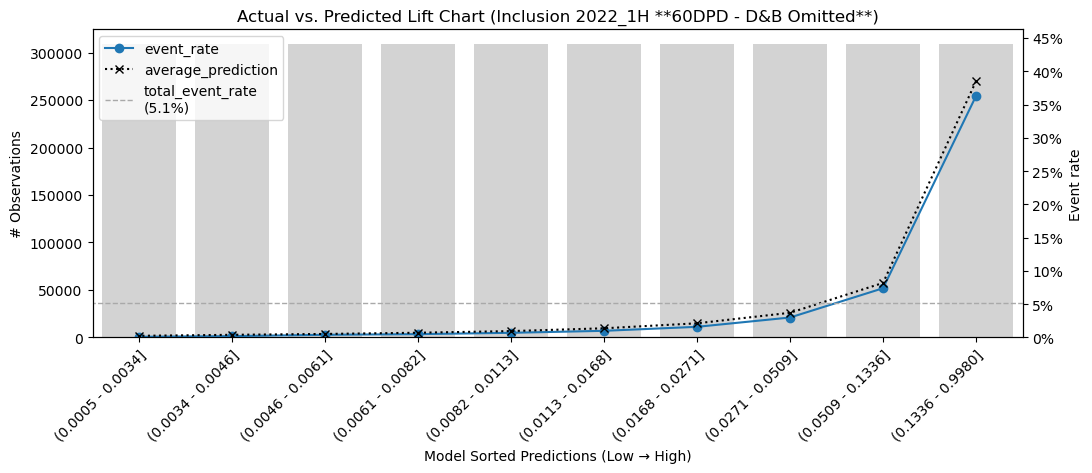

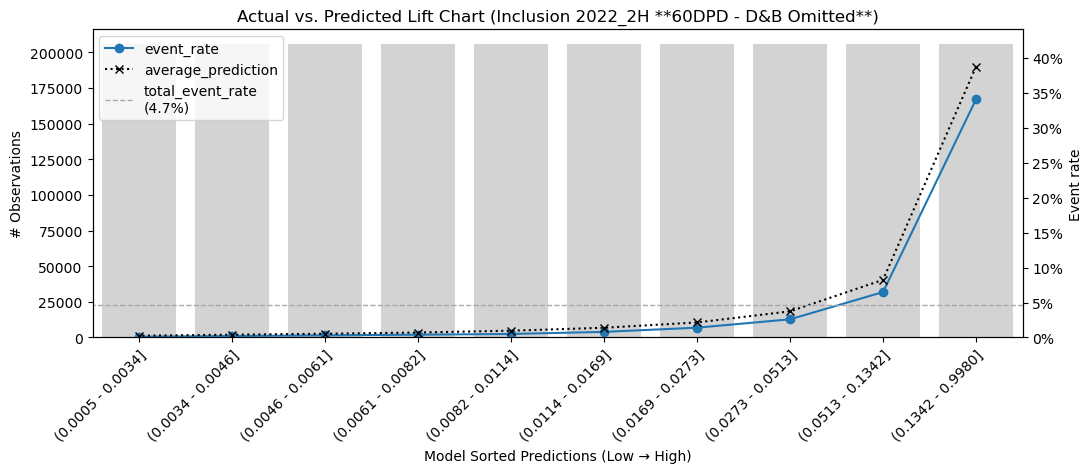

In [50]:
omit60_by_q = split_data_by_q(omit60)

for y in omit60_by_q:
    lift_curve(f'Inclusion {y} **60DPD - D&B Omitted**', calculate_decile_table(omit60_by_q[y], 10, target = 'target', y_pred_proba='y_pred_proba'))

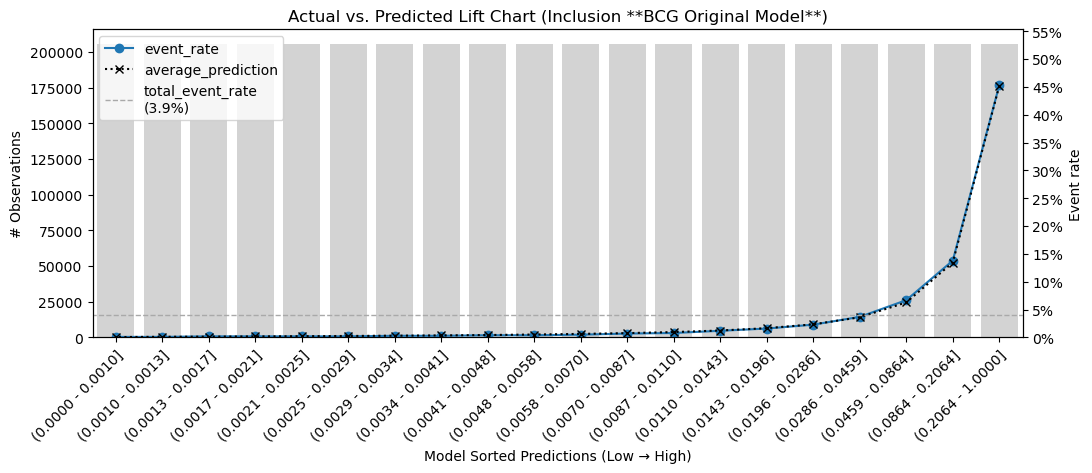

In [10]:
lift_curve(f'Inclusion **90DPD - D&B Omitted**', calculate_decile_table(omit90, 20, target = 'target', y_pred_proba='y_pred_proba'))

C:\Users\w510663\AppData\Local\Temp\ipykernel_23164\449051174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], dayfirst=True, utc=True)


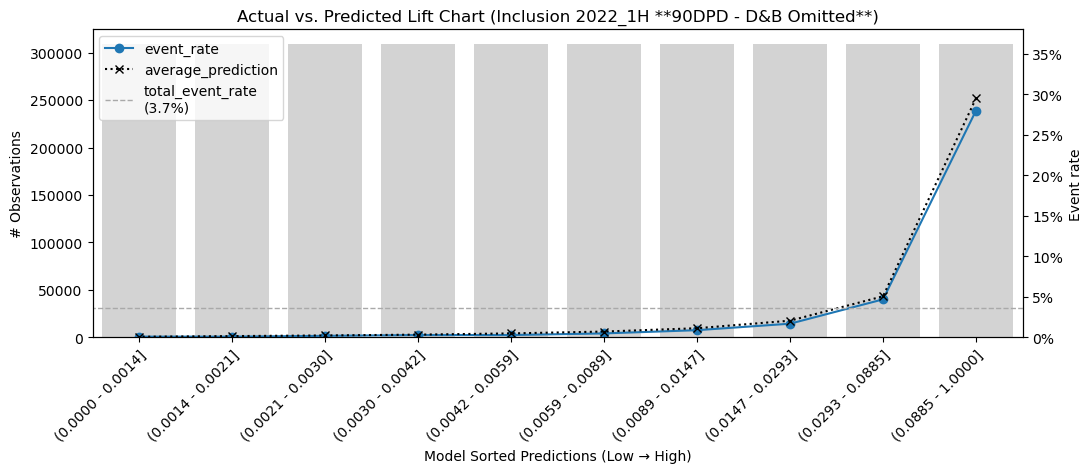

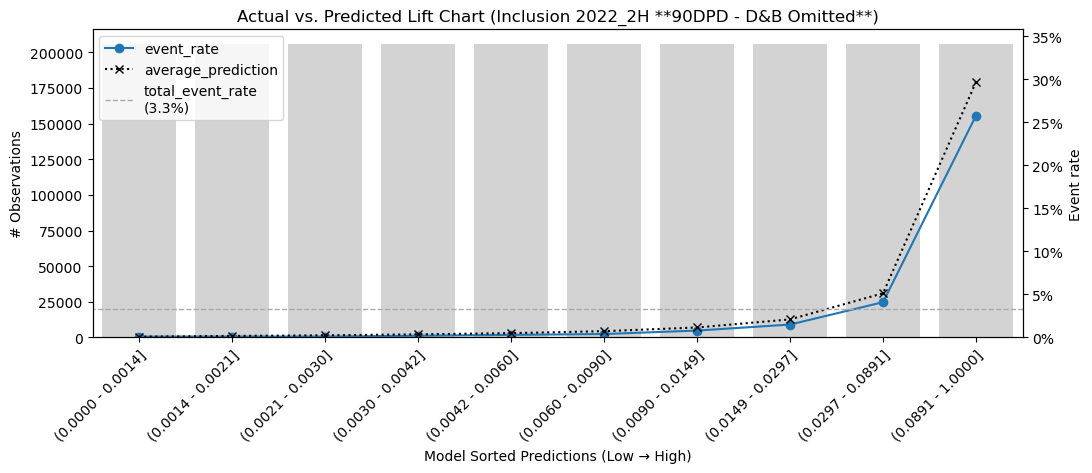

In [51]:
omit90_by_q = split_data_by_q(omit90)

for y in omit90_by_q:
    lift_curve(f'Inclusion {y} **90DPD - D&B Omitted**', calculate_decile_table(omit90_by_q[y], 10, target = 'target', y_pred_proba='y_pred_proba'))